In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import feature_selection
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import ComplementNB

In [3]:
df = pd.read_excel('C:/Users/e.korenkova/Desktop/IDE/zayavka_na_obuchenie1.xlsx', sheet_name='Датасет_2')

In [4]:
df['целевая'].value_counts()

0    5813
1     775
Name: целевая, dtype: int64

In [5]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.insert(4,"count",df.count(),True)
info.insert(4,"type",df.dtypes,True)
info.T   

,T_s,t_1,t_2,t_3,t_4,t_5,t_6,f_1,f_2,f_3,f_4,d_s,целевая,идентификатор
IsNull,2485,2485,2485,2485,2485,2485,2485,107,107,107,107,3219,0,0
IsNa,2485,2485,2485,2485,2485,2485,2485,107,107,107,107,3219,0,0
Duplicate,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Unique,4074,6,6,6,6,6,6,3380,3738,2719,2185,885,2,6588
type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,object
count,4103,4103,4103,4103,4103,4103,4103,6481,6481,6481,6481,3369,6588,6588


In [6]:
df=df[df['f_4'] >-12]
df=df[df['f_2'] < 10]

In [7]:
df['f_1']=df['f_1'].fillna(df['f_1'].median())
df['f_2']=df['f_2'].fillna(df['f_2'].median())
df['f_3']=df['f_3'].fillna(df['f_3'].median())
df['f_4']=df['f_4'].fillna(df['f_4'].median())
df['d_s']=df['d_s'].fillna(df['d_s'].median())
df['T_s']=df['T_s'].fillna(df['T_s'].median())
df['t_1']=df['t_1'].fillna(df['t_1'].median())
df['t_2']=df['t_2'].fillna(df['t_2'].median())
df['t_3']=df['t_3'].fillna(df['t_3'].median())
df['t_4']=df['t_4'].fillna(df['t_4'].median())
df['t_5']=df['t_5'].fillna(df['t_5'].median())
df['t_6']=df['t_6'].fillna(df['t_6'].median())

In [8]:
df['целевая'].value_counts()

0    5587
1     743
Name: целевая, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6330 entries, 0 to 6587
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T_s            6330 non-null   float64
 1   t_1            6330 non-null   float64
 2   t_2            6330 non-null   float64
 3   t_3            6330 non-null   float64
 4   t_4            6330 non-null   float64
 5   t_5            6330 non-null   float64
 6   t_6            6330 non-null   float64
 7   f_1            6330 non-null   float64
 8   f_2            6330 non-null   float64
 9   f_3            6330 non-null   float64
 10  f_4            6330 non-null   float64
 11  d_s            6330 non-null   float64
 12  целевая        6330 non-null   int64  
 13  идентификатор  6330 non-null   object 
dtypes: float64(12), int64(1), object(1)
memory usage: 741.8+ KB


In [10]:
import seaborn as sns
#sns.boxplot(df)

In [11]:
df.corr()

C:\Users\e.korenkova\AppData\Local\Temp\ipykernel_16524\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,T_s,t_1,t_2,t_3,t_4,t_5,t_6,f_1,f_2,f_3,f_4,d_s,целевая
T_s,1.000000,-0.289711,-0.010716,0.242117,0.279317,0.022508,-0.025333,0.018413,0.177566,0.163223,0.167620,-0.083976,0.087775
t_1,-0.289711,1.000000,0.139852,-0.133950,-0.012033,0.197176,0.163413,0.020443,-0.081531,-0.128066,-0.055162,0.017074,-0.011958
t_2,-0.010716,0.139852,1.000000,0.095767,0.106019,0.576898,0.595788,-0.001795,0.018899,0.012924,-0.015889,-0.001580,0.013203
t_3,0.242117,-0.133950,0.095767,1.000000,0.736778,-0.061580,-0.001477,-0.007510,-0.023091,-0.035258,-0.078588,0.002148,0.027643
t_4,0.279317,-0.012033,0.106019,0.736778,1.000000,0.109889,0.126412,0.017633,0.045463,0.042797,0.024663,-0.009958,0.026061
t_5,0.022508,0.197176,0.576898,-0.061580,0.109889,1.000000,0.519717,0.030778,0.069451,0.048047,0.041444,-0.009570,0.017576
t_6,-0.025333,0.163413,0.595788,-0.001477,0.126412,0.519717,1.000000,0.006764,0.029814,0.040203,0.025631,0.004420,0.005168
f_1,0.018413,0.020443,-0.001795,-0.007510,0.017633,0.030778,0.006764,1.000000,0.266843,0.148972,0.175371,-0.019009,0.004007
f_2,0.177566,-0.081531,0.018899,-0.023091,0.045463,0.069451,0.029814,0.266843,1.000000,0.846321,0.389491,-0.131896,0.050500
f_3,0.163223,-0.128066,0.012924,-0.035258,0.042797,0.048047,0.040203,0.148972,0.846321,1.000000,0.450152,-0.101907,0.049063


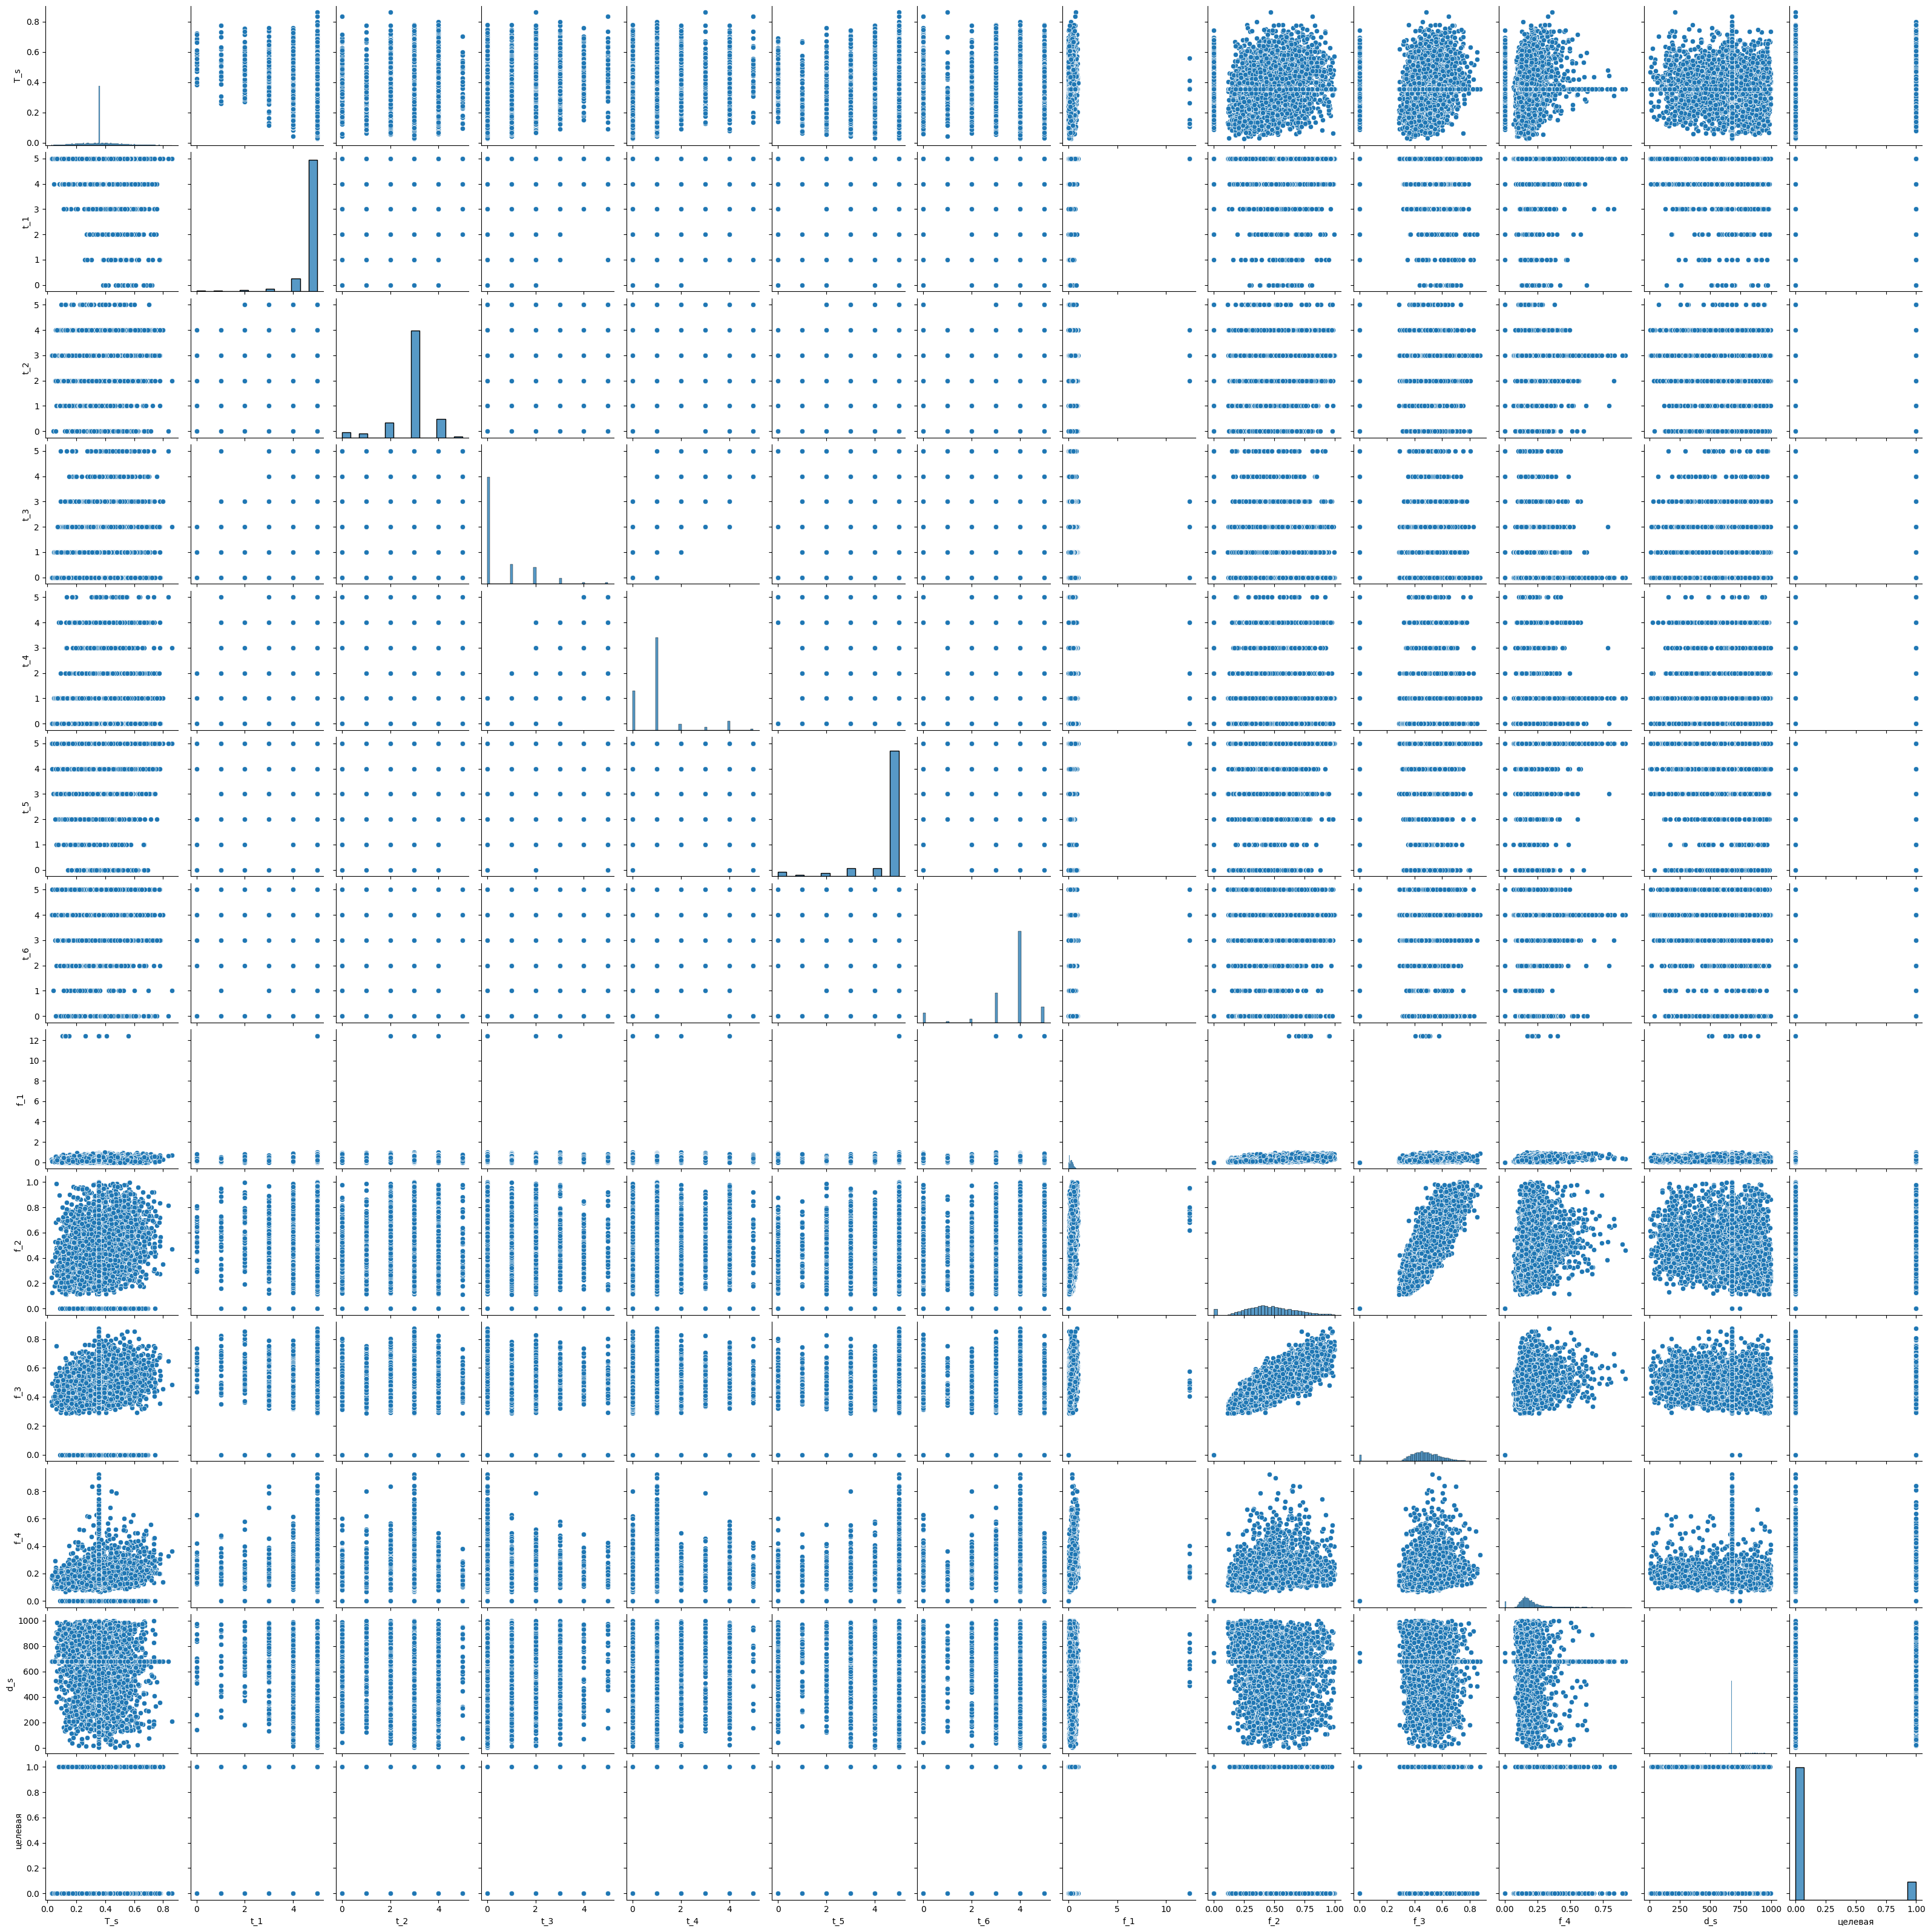

In [12]:
sns_plot = sns.pairplot(df)

In [13]:
df=df.drop(['f_1', 't_6','f_3'], axis=1)

<AxesSubplot: >

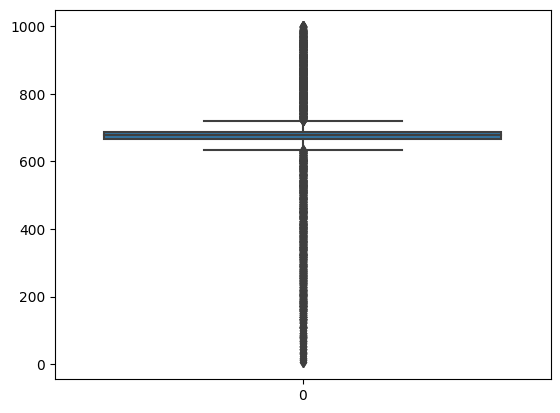

In [14]:
sns.boxplot(df['d_s'])

In [15]:
df=df.drop(['идентификатор'], axis=1)
df.head()

,T_s,t_1,t_2,t_3,t_4,t_5,f_2,f_4,d_s,целевая
0,0.396475,5.0,4.0,0.0,0.0,5.0,0.5931,0.3069,551.0,1
1,0.356048,5.0,3.0,0.0,1.0,5.0,0.5082,0.1608,677.0,0
2,0.356048,5.0,3.0,0.0,1.0,5.0,0.5712,0.1762,677.0,0
3,0.100732,5.0,3.0,0.0,0.0,5.0,0.4151,0.1627,677.0,0
4,0.400366,5.0,3.0,3.0,4.0,5.0,0.5192,0.1648,396.0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6330 entries, 0 to 6587
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   T_s      6330 non-null   float64
 1   t_1      6330 non-null   float64
 2   t_2      6330 non-null   float64
 3   t_3      6330 non-null   float64
 4   t_4      6330 non-null   float64
 5   t_5      6330 non-null   float64
 6   f_2      6330 non-null   float64
 7   f_4      6330 non-null   float64
 8   d_s      6330 non-null   float64
 9   целевая  6330 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 802.0 KB


In [17]:
df['целевая'].value_counts()

0    5587
1     743
Name: целевая, dtype: int64

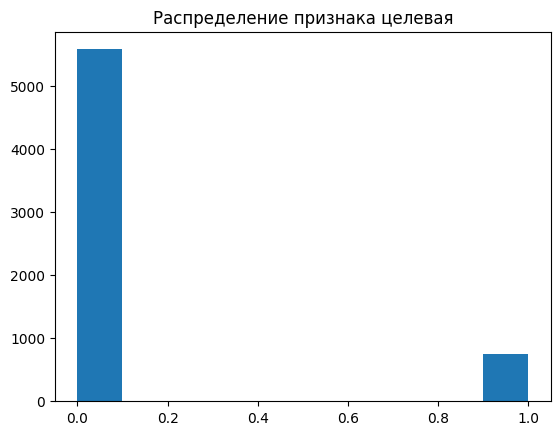

In [18]:
plt.hist(df.целевая)
plt.title('Распределение признака целевая');

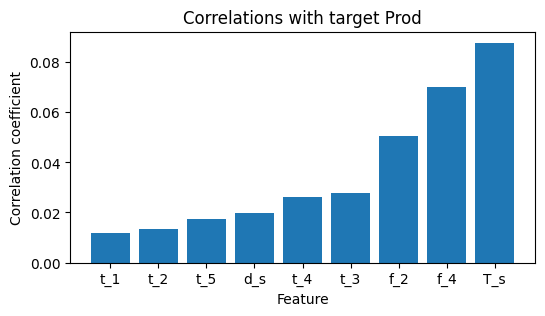

In [19]:
corr_with_target = df.corr()['целевая'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('целевая')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(6, 3)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target Prod') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y


In [20]:
from sklearn import linear_model #линейные модели
from sklearn. model_selection import train_test_split

In [21]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = df[['T_s','t_2','t_4','t_5','t_3','f_2','f_4','d_s']]
y = df['целевая']

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [32]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = df[['T_s','t_2','t_4','t_5','t_3','f_2','f_4','d_s']]
y = df['целевая']

In [33]:
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (4431, 8)
Test shape: (1899, 8)


In [34]:
dt = tree.DecisionTreeClassifier(
    random_state=0, #глубина
    criterion='gini', max_depth=5,
    min_samples_split= 3
)

Accuracy: 0.877
Train accuracy: 0.887
Test accuracy: 0.877
Depth: 5
Count of leaves: 22


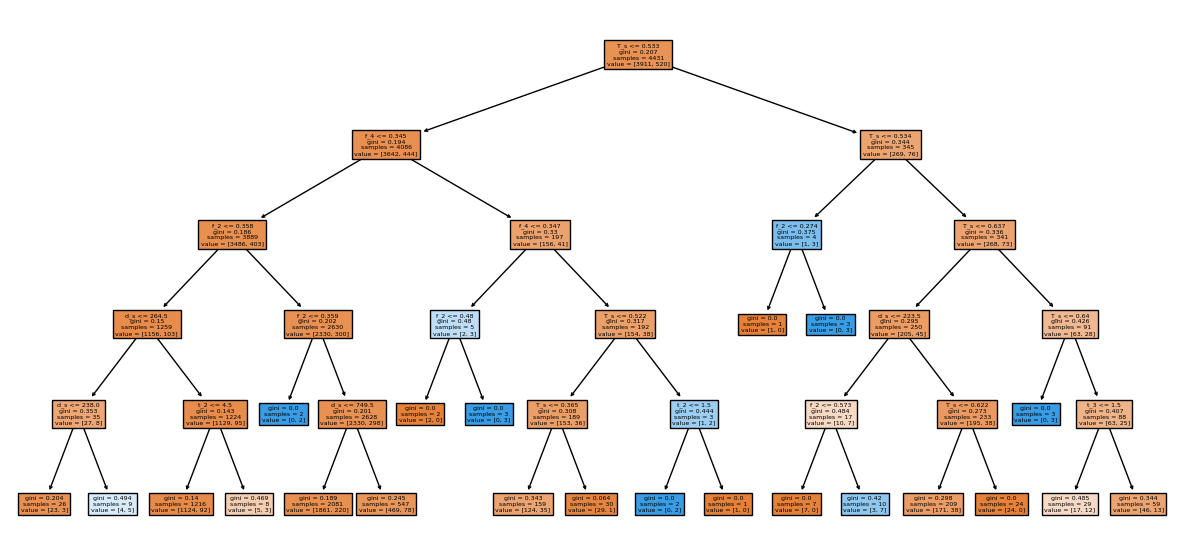

In [35]:
dt.fit(X_train, y_train)

# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);
# Делаем предсказание
y_test_pred = dt.predict(X_test)
# Считаем метрику accuracy на тестовой выборке
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
# Считаем метрику accuracy на обучающей и тестовой выборках
print('Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Depth: {}'.format(dt.get_depth()))
print('Count of leaves: {}'.format(dt.get_n_leaves()))

In [36]:
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

In [37]:
cv = model_selection.StratifiedKFold(n_splits=5)

In [38]:
# Инициализируем поиск на сетке и обучаем его
gs = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=0), #модель
    param_grid=param_grid, #сетка параметров
    scoring='accuracy', #метрика
    cv=cv, #кросс-валидатор
    n_jobs=-1 #используем все мощности процессора
)
gs.fit(X_train, y_train)
print(gs.best_params_)
# Определяем наилучшую модель
best_tree = gs.best_estimator_

# Делаем предсказание
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)
# Считаем метрику accuracy на обучающей и тестовой выборках
print('Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 3}
Train accuracy: 0.884
Test accuracy: 0.880
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3911
           1       1.00      0.01      0.02       520

    accuracy                           0.88      4431
   macro avg       0.94      0.51      0.48      4431
weighted avg       0.90      0.88      0.83      4431

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1676
           1       0.00      0.00      0.00       223

    accuracy                           0.88      1899
   macro avg       0.44      0.50      0.47      1899
weighted avg       0.78      0.88      0.83      1899



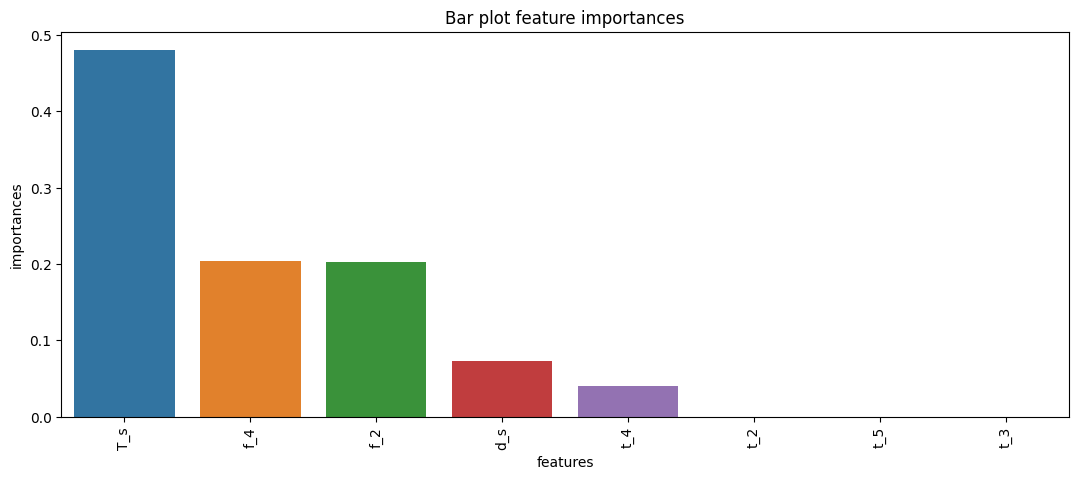

In [30]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
features = X.columns #признаки
feature_importances = best_tree.feature_importances_ #важность признаков
# Создаём DataFrame, содержащий информацию о важности признаков
importances_data = pd.DataFrame({'features': features, 'importances': feature_importances})
importances_data = importances_data.sort_values(by='importances', ascending=False)
# Строим столбчатую диаграмму
sns.barplot(data=importances_data, x='features', y='importances', ax=ax);
# Добавляем подпись к графику и поворот меток на оси абсцисс
ax.set_title('Bar plot feature importances')
ax.xaxis.set_tick_params(rotation=90)

In [40]:
from sklearn import linear_model #линейные модели
from sklearn. model_selection import train_test_split

In [41]:
#Создаём объект класса LogisticRegression
log_reg = linear_model.LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

c:\Users\e.korenkova\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [42]:
y_pred = log_reg.predict(X)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1676
           1       0.00      0.00      0.00       223

    accuracy                           0.88      1899
   macro avg       0.44      0.50      0.47      1899
weighted avg       0.78      0.88      0.83      1899

